In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import ipywidgets as widgets

In [3]:
#df = pd.read_csv('/winequality-red.csv', delimiter=';') #coloquei o delimete devido a que o data set é europeu, e eles utilizam ';' ao envez de ','


df.info()
df.head()
df.isnull().sum()
statistics = df.describe()
statistics
#O dataset possui 1599 linhas e 12 colunas, sendo 11 features e 1 target (quality).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
def analisar_coluna_outliers(df):
    def plotar(coluna):
        clear_output(wait=True)

        # Cálculo estatístico
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        median = df[coluna].median()

        outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
        normais = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

        # Subplots
        fig, axes = plt.subplots(1, 2, figsize=(16, 5), gridspec_kw={'width_ratios': [2, 1]})

        sns.histplot(normais[coluna], bins=20, kde=False, color='skyblue', label='Valores normais', ax=axes[0], alpha=0.8)
        sns.histplot(outliers[coluna], bins=20, kde=False, color='crimson', label='Outliers', ax=axes[0], alpha=0.8)

        # Linhas no histograma
        axes[0].axvline(Q1, color='orange', linestyle='--', label=f'Q1 = {Q1:.1f}')
        axes[0].axvline(Q3, color='orange', linestyle='--', label=f'Q3 = {Q3:.1f}')
        axes[0].axvline(median, color='red', linestyle='--', label=f'Mediana = {median:.1f}')
        axes[0].axvline(limite_inferior, color='green', linestyle=':', label=f'Limite Inferior = {limite_inferior:.1f}')
        axes[0].axvline(limite_superior, color='purple', linestyle=':', label=f'Limite Superior = {limite_superior:.1f}')
        axes[0].set_title(f'Histograma de {coluna}')
        axes[0].set_xlabel(coluna)
        axes[0].set_ylabel('Frequência')
        axes[0].legend()

        # Boxplot
        sns.boxplot(x=df[coluna], color='skyblue', ax=axes[1])
        axes[1].axvline(median, color='red', linestyle='--', label='Mediana')
        axes[1].axvline(Q1, color='orange', linestyle='--', label=f'Q1 = {Q1:.1f}')
        axes[1].axvline(Q3, color='orange', linestyle='--', label=f'Q3 = {Q3:.1f}')
        axes[1].axvline(limite_inferior, color='green', linestyle=':', label=f'Limite Inferior = {limite_inferior:.1f}')
        axes[1].axvline(limite_superior, color='purple', linestyle=':', label=f'Limite Superior = {limite_superior:.1f}')
        axes[1].legend()
        axes[1].set_title(f'Boxplot de {coluna}')
        axes[1].set_xlabel(coluna)

        plt.tight_layout()
        plt.show()

        # Mostrar outliers
        print(f"\n🔎 Existem {len(outliers)} outliers na coluna '{coluna}'.")
        if len(outliers) > 0:
            print("\nOutliers encontrados:")
            for i, val in outliers[coluna].sort_values().items():
                print(f"Índice: {i}  |  Valor: {val}")
    # Dropdown interativo com as colunas numéricas
    colunas_numericas = df.select_dtypes(include='number').columns.tolist()
    dropdown = widgets.Dropdown(options=colunas_numericas, description='Coluna:')

    widgets.interact(plotar, coluna=dropdown)


In [20]:
analisar_coluna_outliers(df)

interactive(children=(Dropdown(description='Coluna:', options=('fixed acidity', 'volatile acidity', 'citric ac…

<ipython-input-19-4cdd6b331335>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=feature, data=df, palette='coolwarm', legend = False)
<ipython-input-19-4cdd6b331335>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=feature, data=df, palette='coolwarm', legend = False)
<ipython-input-19-4cdd6b331335>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=feature, data=df, palette='coolwarm', legend = False)
<ipython-input-19-4cdd6b331335>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

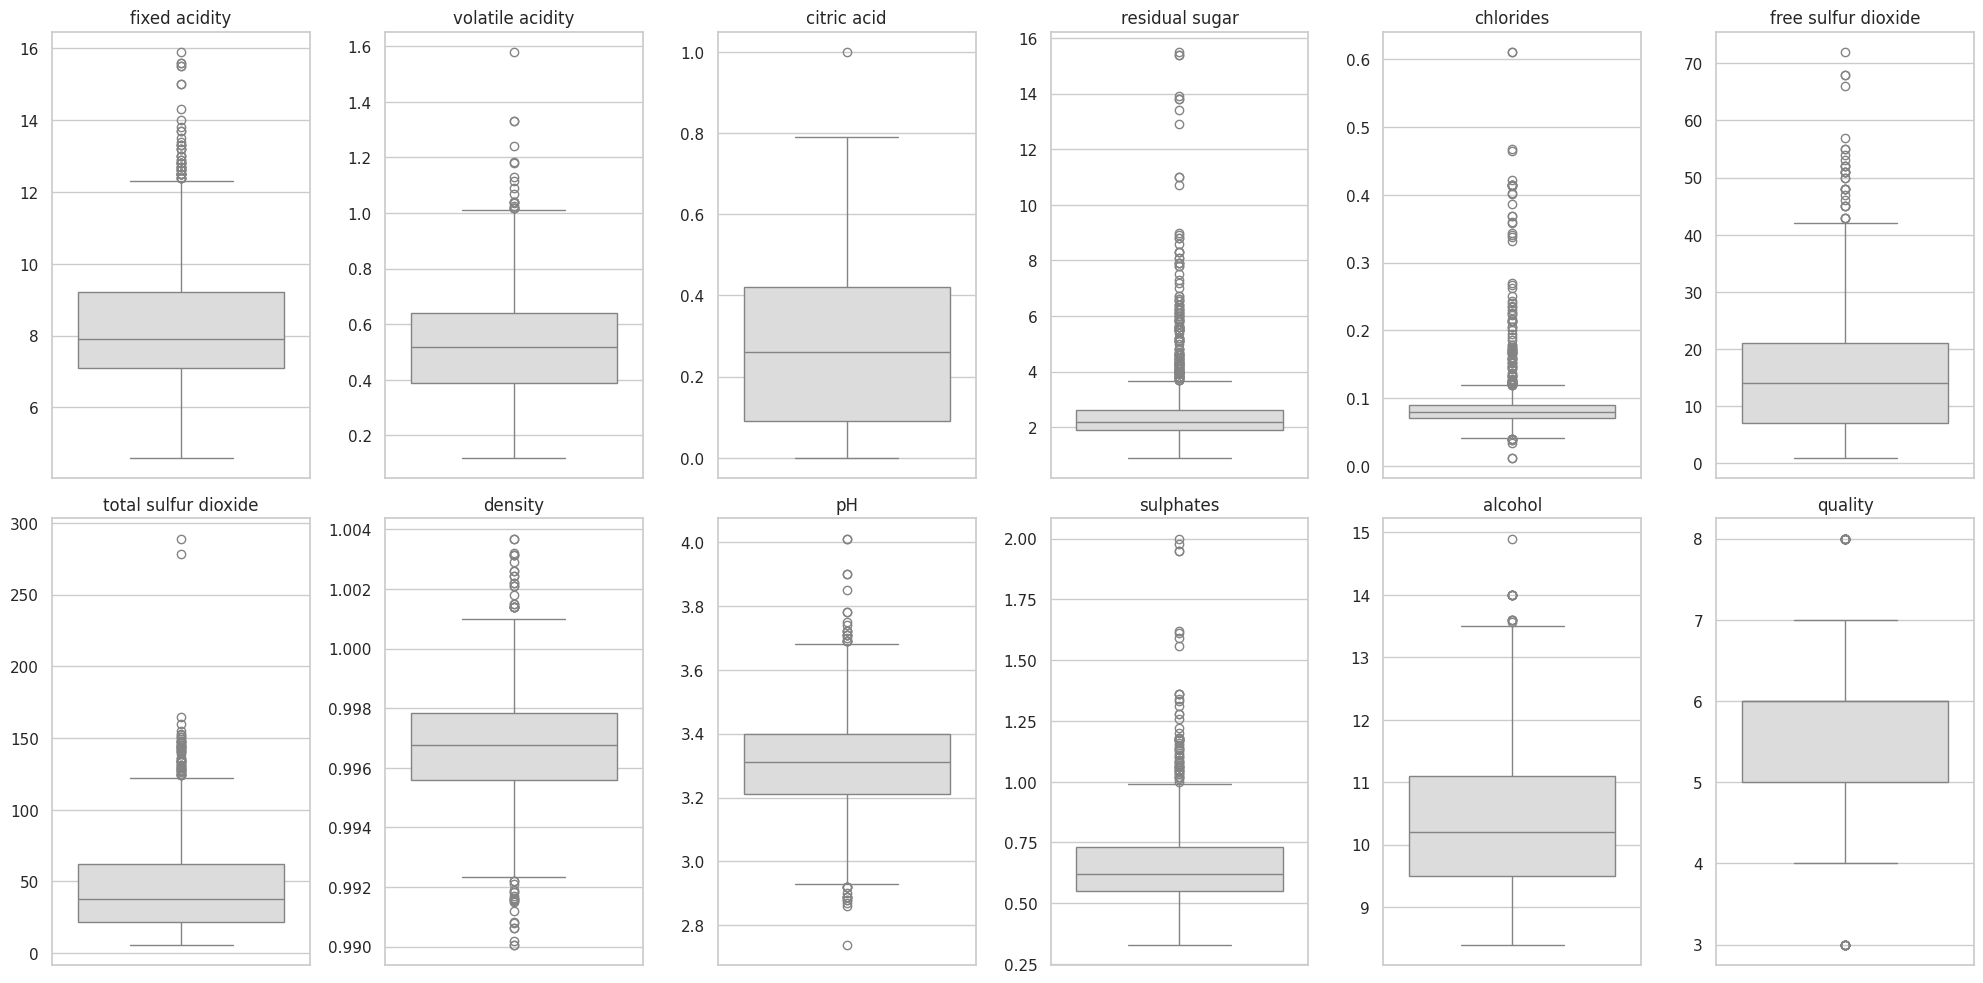

In [19]:
features = df.columns
# Setting the style for the plots
sns.set(style="whitegrid")

# Creating a figure for the boxplots
plt.figure(figsize=(20, 10))

# Plotting boxplots for each feature with specified colors
for i, feature in enumerate(features):
    plt.subplot(2, len(features)//2 + len(features)%2, i+1)
    sns.boxplot(y=feature, data=df, palette='coolwarm', legend = False)
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('')

# Adjusting layout for better readability
plt.tight_layout()
plt.show()